In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scp

In [36]:
data = pd.read_csv('data_hw4.csv', sep = ';', decimal = ',', encoding = 'utf-8')

data = data[['unemployment', 'GDP_growth']]

In [37]:
data.head()

,unemployment,GDP_growth
0,9.2,0.047627
1,8.5,0.010422
2,8.3,0.086439
3,8.5,0.230795
4,8.9,0.149709


<AxesSubplot: xlabel='unemployment', ylabel='GDP_growth'>

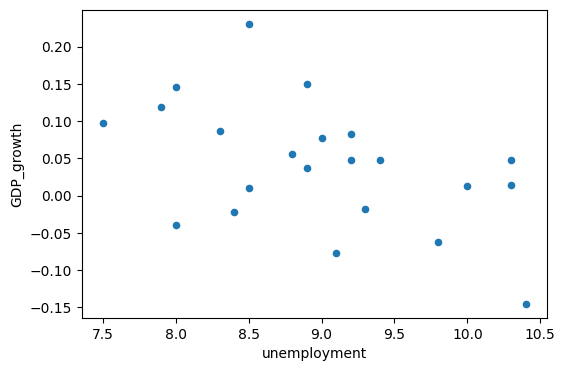

In [60]:
data.plot.scatter(x = 'unemployment', y = 'GDP_growth', figsize = (6, 4))

In [40]:
corr = data.corr().values[0, 1]
corr

-0.478730766079507

Значение корреляции принимает отрицательное значение

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics

x_train, x_test, y_train, y_test = train_test_split(data[['unemployment']].values, 
                                                    data[['GDP_growth']].values, 
                                                    test_size = 0.2,
                                                    random_state = 1)
  
# create linear regression object
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(x_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
print('Variance score: ', reg.score(x_test, y_test))


result = reg.predict(x_test)
print(result)
print(y_test)

Coefficients:  [[-0.05880882]]
Variance score:  -0.34832319161660186
[[ 0.06267134]
 [-0.03142277]
 [ 0.05679045]
 [-0.04906542]
 [ 0.02738605]]
[[-0.021364]
 [ 0.013576]
 [ 0.230795]
 [ 0.047356]
 [ 0.07752 ]]


In [51]:
scp.shapiro(data[['unemployment']].values)

ShapiroResult(statistic=0.9652262926101685, pvalue=0.6014244556427002)

In [52]:
scp.shapiro(data[['GDP_growth']].values)

ShapiroResult(statistic=0.9907671213150024, pvalue=0.9983901381492615)

In [53]:
scp.jarque_bera(data[['unemployment']].values)

Jarque_beraResult(statistic=0.6823816593102153, pvalue=0.7109232300263173)

In [54]:
scp.jarque_bera(data[['GDP_growth']].values)

Jarque_beraResult(statistic=0.022352222344902712, pvalue=0.9888861095470721)

In [55]:
scp.chisquare(data[['unemployment']].values)

Power_divergenceResult(statistic=array([1.57860395]), pvalue=array([1.]))

In [56]:
scp.chisquare(data[['GDP_growth']].values)

Power_divergenceResult(statistic=array([3.64227177]), pvalue=array([0.99999127]))